# XG-Boost

- XGBoost（eXtreme Gradient Boosting）は、Gradient Boostingという機械学習アルゴリズムの一種
- 回帰、分類、ランキング、異常検出などのさまざまな機械学習タスクに使用できます。Gradient Boostingは、弱学習器（決定木など）を組み合わせて、強力な予測モデルを作成するためのアンサンブル学習法です。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

## 回帰問題（Regression）

In [2]:
le_df = pd.read_csv('./input_data/Life_Expectancy_Data.csv')
le_df.head(5)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
le_df = pd.get_dummies(le_df, columns = ['Status'])

In [4]:
le_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  Diphtheria          

In [5]:
le_df.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64

In [6]:
# 欠損を平均で穴埋め
le_df = le_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [7]:
y = le_df['Life expectancy ']
X = le_df.drop(columns=['Life expectancy '])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [8]:
reg = XGBRegressor(
    objective ='reg:squarederror', 
    learning_rate = 0.1, 
    max_depth = 30, 
    n_estimators = 100
)

In [9]:
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
y_pred = reg.predict(X_test)

In [11]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 1.9 
MSE = 3.6103123099771914 
MAE = 1.231076272001834 
R2 = 0.9598536603548637 
Adjusted R2 = 0.958671229593927


## 分類問題（Classifier）

In [12]:
cardio_df = pd.read_csv('./input_data/cardio.csv')
cardio_df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Features available are:
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

### Exploratory Data Analysis

In [13]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [14]:
cardio_df = cardio_df.drop('id', axis=1)
cardio_df['age'] = cardio_df['age']/365
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
#  ヒストグラム
# cardio_df.hist(bins = 30, figsize = (20,20), color = 'r')
# plt.show()

In [16]:
# 相関係数
# corr_matrix = cardio_df.corr()

# plt.figure(figsize=(16, 16))
# sns.heatmap(corr_matrix, annot = True)
# plt.show()

### Analyze

In [17]:
y=cardio_df['cardio']
X=cardio_df.drop(columns=['cardio'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
xgb = XGBClassifier(max_depth=15, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### よく使うハイパーパラメータ（classifier）
- n_estimators ... 決定木の数（default:100）
- max_depth ... 決定木の最大深度（default:6）
- learning_rate（eta） ... 学習率。収束速度や予測性能（default:0.1）
- random_state ...  randomseedの制御

In [19]:
y_pred = xgb.predict(X_test)

In [20]:
# 評価
print('Accuracy = {}'.format(accuracy_score(y_test, y_pred).round(4)))
print('Precision = {}'.format(precision_score(y_test, y_pred).round(4)))
print('Recall = {}'.format(recall_score(y_test, y_pred).round(4)))

Accuracy = 0.7064
Precision = 0.715
Recall = 0.6886


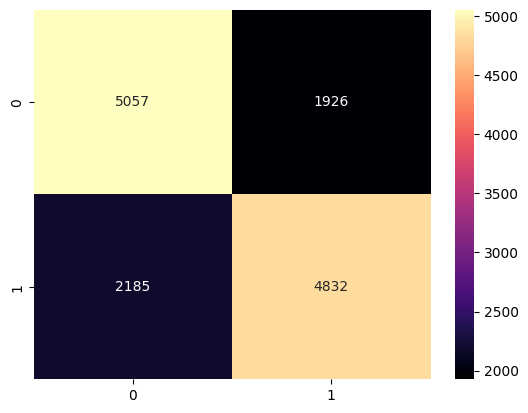

In [21]:
# 混合行列の表示
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.show()

Text(0.5, 0, 'Xgboost Feature Importance')

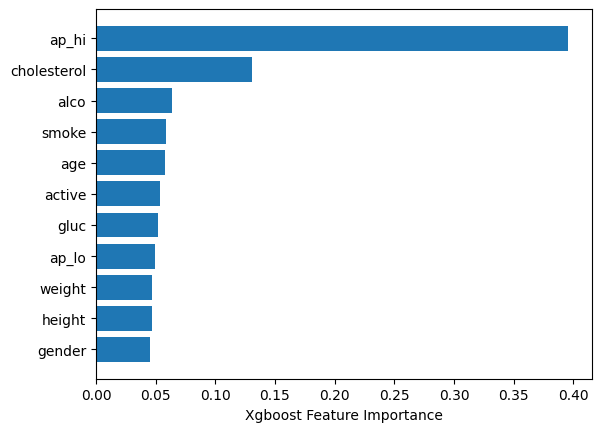

In [22]:
# 特徴量の重要度
# xgb.feature_importances_

sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

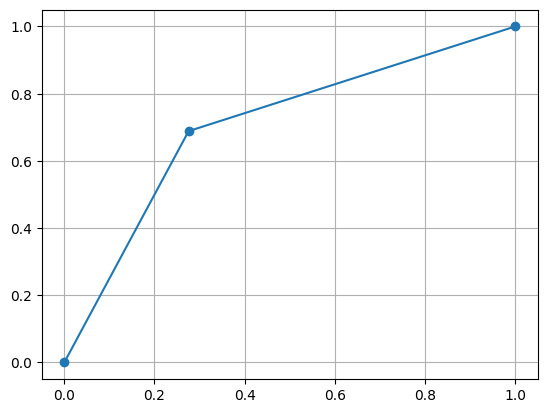

In [23]:
# ROC曲線
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.grid()

## GridSearch

In [24]:
parameters = {
    'n_estimators': [10, 20, 30, 50, 100],  # 用意する決定木モデルの数
    'learning_rate': [0.01, 0.5, 1],             # regularization parameter 
    'max_depth':    (10, 20, 30, None), # 決定木のノード深さの制限値
}

In [25]:
grid = GridSearchCV(estimator =xgb,
                    param_grid = parameters,
                    verbose = 4
                   )

grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.724 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.733 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.726 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.726 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.726 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=20;, score=0.728 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=20;, score=0.733 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=20;, score=0.727 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=20;, score=0.730 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=20;, score=0.7

[CV 1/5] END learning_rate=0.01, max_depth=None, n_estimators=30;, score=0.731 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=None, n_estimators=30;, score=0.733 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=None, n_estimators=30;, score=0.733 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=None, n_estimators=30;, score=0.734 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=None, n_estimators=30;, score=0.727 total time=   0.3s
[CV 1/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=0.731 total time=   0.5s
[CV 2/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=0.734 total time=   0.5s
[CV 3/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=0.733 total time=   0.5s
[CV 4/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=0.736 total time=   0.5s
[CV 5/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=0.730 total time=   0.5s
[CV 1/5] END learnin

[CV 2/5] END learning_rate=0.5, max_depth=30, n_estimators=100;, score=0.695 total time=   5.3s
[CV 3/5] END learning_rate=0.5, max_depth=30, n_estimators=100;, score=0.689 total time=   5.3s
[CV 4/5] END learning_rate=0.5, max_depth=30, n_estimators=100;, score=0.692 total time=   5.2s
[CV 5/5] END learning_rate=0.5, max_depth=30, n_estimators=100;, score=0.692 total time=   5.3s
[CV 1/5] END learning_rate=0.5, max_depth=None, n_estimators=10;, score=0.733 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=None, n_estimators=10;, score=0.737 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=None, n_estimators=10;, score=0.731 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=None, n_estimators=10;, score=0.739 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=None, n_estimators=10;, score=0.730 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=None, n_estimators=20;, score=0.732 total time=   0.2s
[CV 2/5] END learning_rate=0.5, ma

[CV 4/5] END learning_rate=1, max_depth=30, n_estimators=20;, score=0.686 total time=   1.2s
[CV 5/5] END learning_rate=1, max_depth=30, n_estimators=20;, score=0.683 total time=   1.2s
[CV 1/5] END learning_rate=1, max_depth=30, n_estimators=30;, score=0.682 total time=   2.0s
[CV 2/5] END learning_rate=1, max_depth=30, n_estimators=30;, score=0.690 total time=   2.0s
[CV 3/5] END learning_rate=1, max_depth=30, n_estimators=30;, score=0.679 total time=   1.8s
[CV 4/5] END learning_rate=1, max_depth=30, n_estimators=30;, score=0.684 total time=   1.7s
[CV 5/5] END learning_rate=1, max_depth=30, n_estimators=30;, score=0.681 total time=   1.7s
[CV 1/5] END learning_rate=1, max_depth=30, n_estimators=50;, score=0.683 total time=   2.7s
[CV 2/5] END learning_rate=1, max_depth=30, n_estimators=50;, score=0.689 total time=   2.6s
[CV 3/5] END learning_rate=1, max_depth=30, n_estimators=50;, score=0.682 total time=   2.7s
[CV 4/5] END learning_rate=1, max_depth=30, n_estimators=50;, score=0.

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=15,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.5, 1],
                         'max_depth': (10, 20, 30, None),
                         'n_estimators': [10, 20, 30, 50, 100]},
             verbose=4)

In [26]:
# 最適なパラメータを用いたランダムフォレストのモデル
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [27]:
y_pred_optim = grid.predict(X_test)

In [28]:
print('Accuracy = {}'.format(accuracy_score(y_test, y_pred_optim).round(4)))
print('Precision = {}'.format(precision_score(y_test, y_pred_optim).round(4)))
print('Recall = {}'.format(recall_score(y_test, y_pred_optim).round(4)))

Accuracy = 0.7341
Precision = 0.7559
Recall = 0.6933


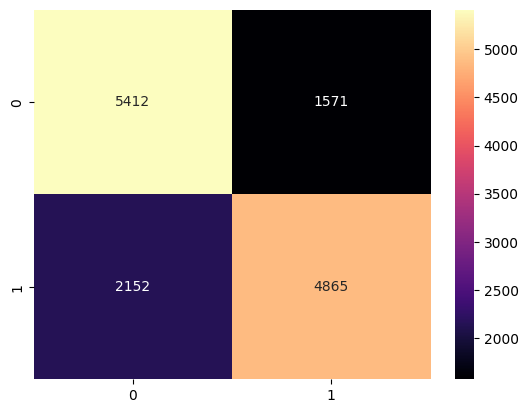

In [29]:
# 混合行列の表示
cm = confusion_matrix(y_test, y_pred_optim)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.show()

In [30]:
print('Best params: {}'.format(grid.best_params_)) 
print('Best score: {}'.format(grid.best_score_))

Best params: {'learning_rate': 0.5, 'max_depth': None, 'n_estimators': 10}
Best score: 0.7340000000000001
